<a href="https://colab.research.google.com/github/vongmaianh170196/statistical_data_analysis_utu/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr, chi2_contingency, shapiro, mannwhitneyu, spearmanr
import warnings

warnings.filterwarnings('ignore')

**Data preparation**

1. Load the data and check if variables match the documentation

2. Modify data
  
   Filter invalid value according to the logic listed in the table below:
      <table>
        <tr>
          <th><p>Variable</p> </th>
          <th></th>
          <th><p>Condition of invalid value</p> </th>
        </tr>
        <tr>
          <td><p>Ticket</p> </td>
          <td></td>
          <td><p>Ticket type is not 'single', or 'season', or  'savonia'</p> </td>
        </tr>
        <tr>
          <td><p> Cost</p> </td>
          <td></td>
          <td>
            <p>Value is less than 0.</p>           
            <p>Value equals to 0 is acceptable in this analysis as there are cases the distance and the duration of use is too little to charge or the user has discount from the coupon</p> </td>
        </tr>
        <tr>
          <td><p>Month</p></td>
          <td></td>
          <td><p>Month values has to be within the range from 1 to 12</p> </td>
        </tr>
        <tr>
          <td>
          <p>Location from</p>
          <p> Location to</p>
          </td>
          <td></td>
          <td><p>Null or empty string</p></td>
        </tr>
        <tr>
          <td>
          <p>Duration</p>
          <p>Distance</p>
          <p>Energy used</p>
          <p>Energy collected</p>
          </td>
          <td></td>
          <td>
          <p>Value is less than 0</p>
          </td>
        </tr>
        <tr>
          <td><p>Assistance</p></td>
          <td></td>
          <td><p>Value is neither 1 nor 0</p></td>
        </tr>
      </table>
  

In [ ]:
df = pd.read_csv("bikes.data")

expected_columns = [
    "ticket", "cost", "month", "location_from", "location_to",
    "duration", "distance", "assistance", "energy_used", "energy_collected"
]

if df.columns.tolist() == expected_columns:
    print("Variables match the documentation.")
else:
    print("Variables do not match the documentation.")

def filter_and_count_invalid(data):
    invalid_counts = {}

    # Filter ticket column
    valid_tickets = ['single', 'season', 'savonia']
    invalid_tickets = data[~data['ticket'].isin(valid_tickets)]
    invalid_counts["ticket"] = len(invalid_tickets)
    data.loc[invalid_tickets.index, 'ticket'] = np.nan

    # Filter cost column
    invalid_costs = data[data['cost'] < 0]
    invalid_counts["cost"] = len(invalid_costs)
    data.loc[invalid_costs.index, 'cost'] = np.nan

    # Filter month column
    invalid_months = data[~data['month'].between(1, 12)]
    invalid_counts["month"] = len(invalid_months)
    data.loc[invalid_months.index, 'month'] = np.nan

    # Filter duration column
    invalid_durations = data[data['duration'] < 0]
    invalid_counts["duration"] = len(invalid_durations)
    data.loc[invalid_durations.index, 'duration'] = np.nan

    # Filter distance column
    invalid_distances = data[data['distance'] < 0]
    invalid_counts["distance"] = len(invalid_distances)
    data.loc[invalid_distances.index, 'distance'] = np.nan

    # Filter location_from column
    invalid_location_from = data[data['location_from'].isnull() | (data['location_from'] == "")]
    invalid_counts["location_from"] = len(invalid_location_from)
    data.loc[invalid_location_from.index, 'location_from'] = np.nan

    # Filter location_to column
    invalid_location_to = data[data['location_to'].isnull() | (data['location_to'] == "")]
    invalid_counts["location_to"] = len(invalid_location_to)
    data.loc[invalid_location_to.index, 'location_to'] = np.nan

    # Filter assistance column
    valid_assistance = [0, 1]
    invalid_assistance = data[~data['assistance'].isin(valid_assistance)]
    invalid_counts["assistance"] = len(invalid_assistance)
    data.loc[invalid_assistance.index, 'assistance'] = np.nan

    # Filter energy_used column
    invalid_energy_used = data[data['energy_used'] < 0]
    invalid_counts["energy_used"] = len(invalid_energy_used)
    data.loc[invalid_energy_used.index, 'energy_used'] = np.nan

    # Filter energy_collected column
    invalid_energy_collected = data[data['energy_collected'] < 0]
    invalid_counts["energy_collected"] = len(invalid_energy_collected)
    data.loc[invalid_energy_collected.index, 'energy_collected'] = np.nan

    data = data.dropna()
    return data, invalid_counts

bikes_data, invalid_counts = filter_and_count_invalid(df)
# Check which column has invalid data and how many rows it has
for column, count in invalid_counts.items():
    if count > 0:
      print(f"Column: {column} has {count} invalid values")


Variables match the documentation.
Column: distance has 39 invalid values


In [ ]:
# Data Exploration
# Describe the data
print(f"Most frequent departure location: {bikes_data['location_from'].value_counts()}")
print(f"Least frequent departure location: {bikes_data['location_from'].value_counts().idxmin()}")
print(f"Most frequent arrival location: {bikes_data['location_to'].value_counts()}")
print(f"Least frequent arrival location: {bikes_data['location_to'].value_counts().idxmin()}")
print()
print("Numberical data description")

data_description = bikes_data.describe().drop(['25%', '50%', '75%'])
print(data_description)

Most frequent departure location: TORI              404
KAUPPAKATU        231
SATAMA            199
MICROTEKNIA       181
NEULAMÄKI         157
PUIJONLAAKSO      155
KEILANKANTA       150
TASAVALLANKATU    141
KYS                89
PIRTTI             28
Name: location_from, dtype: int64
Least frequent departure location: PIRTTI
Most frequent arrival location: TORI              388
KAUPPAKATU        277
PUIJONLAAKSO      184
MICROTEKNIA       175
SATAMA            161
NEULAMÄKI         155
TASAVALLANKATU    153
KEILANKANTA       140
KYS                72
PIRTTI             30
Name: location_to, dtype: int64
Least frequent arrival location: PIRTTI

Numberical data description
              cost        month      duration      distance   assistance  \
count  1735.000000  1735.000000   1735.000000   1735.000000  1735.000000   
mean      0.499597     7.223631    681.594236   2522.847262     0.914697   
std       4.173056     1.709805   1152.022110   2338.679540     0.279412   
min       0.0

**Data preparation**

3. Data summary:


   In terms of Location, Tori is the most frequent area for departure and arriving while Pirtti has the least visting.

  In addition, the table above describes the total valid values, the mean, standard deviation, minumum, maximum of the data in each columns.

  - **Cost**: The mean value is approximately 0.50 euros, with a standard deviation of 4.17. The minimum value is 0, while the maximum is 100.
  - **Month**: The bikes are mostly rented from April ro October, with the mean month being around 7.22.
  - **Duration**: The average trip duration is approximately 681.59 seconds, with a standard deviation of 1152.02 seconds. The minimum duration is 2 seconds, while the maximum is 25614 seconds.
  - **Distance**: The mean value is roughly 2522.85 meters, with a standard deviation of 2338.68 meters which indicates a high variation.
  - **Assistance** The average usage of electric assistance is approximately 0.91, which indicates it is widely used in most of the trips.
  - **Energy Used and Energy Collected**: The mean energy used and energy collected during a trip are approximately 17.78 and 5.77 watt-hours, respectively. There is a considerable variation in energy usage and collection, as the maximum values being 144.9 and 56.4 watt-hours and the standard deviation is 17,19 and 6.39, respectively.

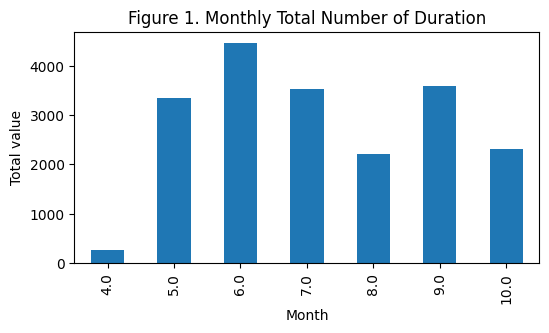

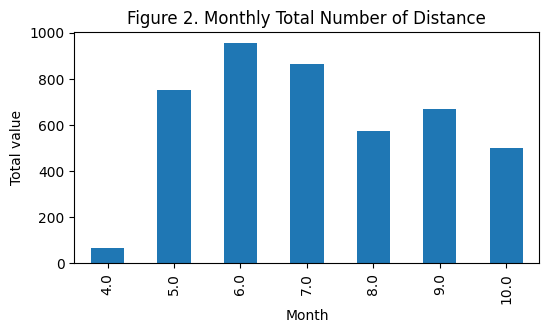

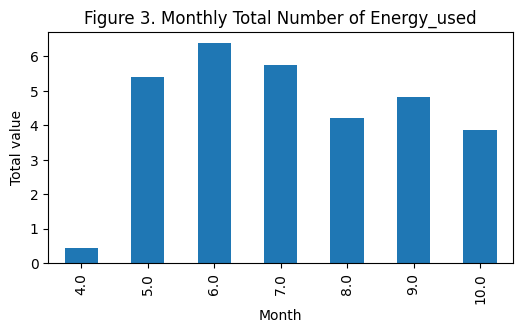

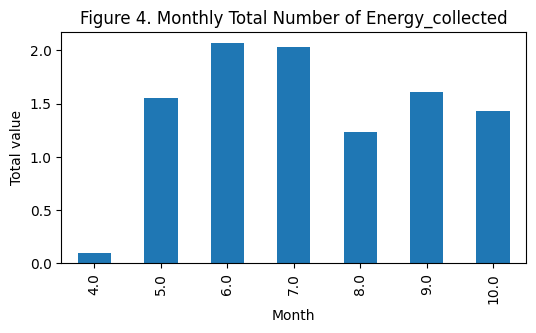

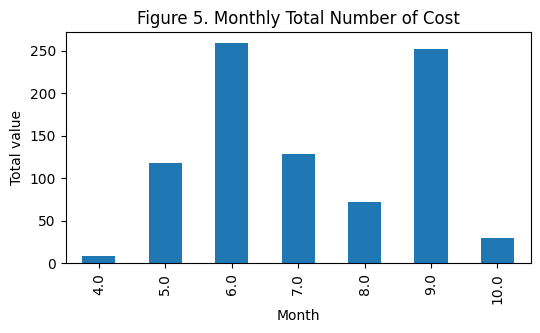

In [ ]:
# Data Exploration
# Visualizations
# Converting values to universal units duration (minutes), energy_used (kWh), energy_collected (kWh), distance (km)
bikes_data['duration'] /= 60
bikes_data['energy_used'] /= 1000
bikes_data['energy_collected'] /= 1000
bikes_data['distance'] /= 1000

metrics = ['duration', 'distance', 'energy_used', 'energy_collected', 'cost']
total_by_month = bikes_data.groupby('month')[metrics].sum()

# Creating bar chart for each metric
for index, metric in enumerate(metrics):
    plt.figure(figsize=(6, 3))
    total_by_month[metric].plot.bar()
    plt.title(f'Figure {index + 1}. Monthly Total Number of {metric.capitalize()}')
    plt.xlabel('Month')
    plt.ylabel('Total value')
    plt.show()

**Data preparation**

4. Visualization:

  The charts above visualize the mean value of duration, distance, energy used, energy collected and the cost monthly. Gnerally, the bikes are used mostly during June and July and least used in April.

  - Figure 1 shows that the longest duration of bike rental is in June and the shortest is in April which indicates the usage varies seasonally and based on the weather condition.
  - Similarly, Figure 2, 3, 4 indicate that the bike rental is used for long distance during June.
  - Lastly Figure 5 shows that the cost of bike rental is second highest in September but drastically decreased in October


**Data exploration**

  **1. Analysis for Marketing team**

In [ ]:

# Data Exploration
# For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.

print("Below are the calculation for number of trips, total travelled distance, duration and cost per ticket type:\n")
ticket_types = ['single', 'season', 'savonia']
for ticket_type in ticket_types:
    total_by_ticket_type = bikes_data[bikes_data['ticket'] == ticket_type]
    total_trips = len(total_by_ticket_type)
    total_distance = total_by_ticket_type['distance'].sum()
    total_time = total_by_ticket_type['duration'].sum()
    total_fees = total_by_ticket_type['cost'].sum()
    print(f"Ticket type: {ticket_type.capitalize()}")
    print(f"Number of trips: {total_trips}")
    print(f"Total travelled distance: {total_distance} km")
    print(f"Total travelled time: {total_time} minutes")
    print(f"Total fees paid: {total_fees} euros")
    print()



Below are the calculation for number of trips, total travelled distance, duration and cost per ticket type:

Ticket type: Single
Number of trips: 945
Total travelled distance: 2566.3 km
Total travelled time: 11124.1 minutes
Total fees paid: 661.8 euros

Ticket type: Season
Number of trips: 541
Total travelled distance: 1311.5900000000001 km
Total travelled time: 5388.1833333333325 minutes
Total fees paid: 3.0 euros

Ticket type: Savonia
Number of trips: 249
Total travelled distance: 499.25 km
Total travelled time: 3197.15 minutes
Total fees paid: 202.0 euros



Customers choose Single ticket type in most of the trips as the total amount of trips is the highest compared to other season and savonia ticket type. The fees collected from them amount to 661.8 euros with a total distance of 2566.3km.

Followed by Season ticket holders with a considerable number of trips and a substantial distance. However, the fees paid from them are the lowest with only 3 euros in total. This could be the benefits from a subcription or package deal in terms of cost-saving.

Lastly, Savonia ticket holders have the lowest number of trips with the shortest distance of 499.25km in total. This indicates an occasional use of this ticket type as the fees paid is still relatively high with 202euros in total.

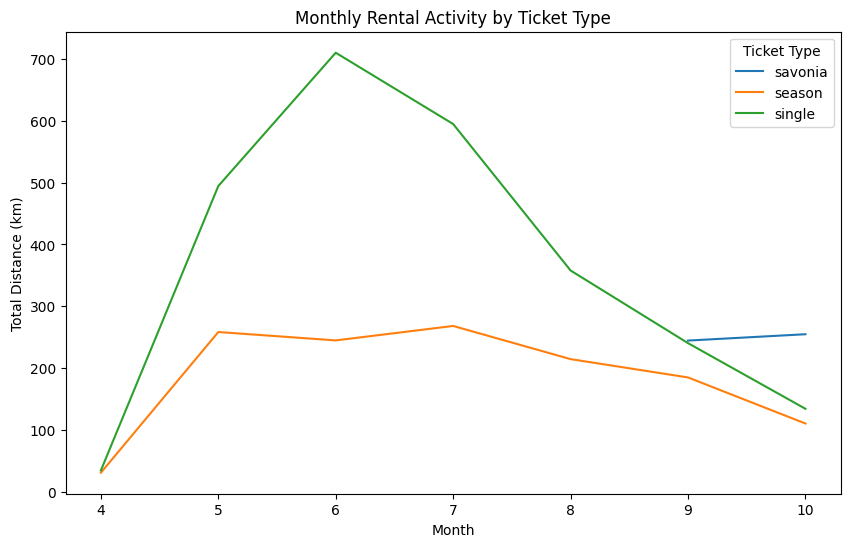

In [ ]:
# Data Exploration
# For each ticket type, visualise the monthly rental activity in terms of the total distance travelled
monthly_activity = bikes_data.groupby(['month', 'ticket'])['distance'].sum().unstack().plot(kind='line', figsize=(10, 6))
plt.title('Monthly Rental Activity by Ticket Type')
plt.xlabel('Month')
plt.ylabel('Total Distance (km)')
plt.legend(title='Ticket Type', loc='upper right')
plt.show()


The chart illustrates the monthly rental activity categorized by ticket type. Generally, the chart indicates an increase in rental activity for both the Single and Season ticket types during the spring and early summer.

Data for the Single ticket type shows a consistent increase in total distance from April to June starting from approximately 35km in April and steadily climbed to 710km in June. Although there was a slight drop in July and August, the total distance covered by Single tickets remained relatively substantial. The total distance then decreased in September and October, but still remained at higher value than the April.

Similarly, for Season ticket type, though the increase was not as sharp as that for the Single ticket type. A steady progression during the spring and early summer months with about 30km in April and reached 270km in July. There was also a decrease in total distance since August and continued to decline in September and October but remained higher than the April.

Conversely, the data for the Savonia ticket type was not well-presented. The rental activity happens mostly in September and October although not as significant as that of the Single and Season ticket types.


**Data exploration**

  **2. Analysis for Logistics team**

In [ ]:
# Data Exploration
# Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference)
departure_counts = bikes_data['location_from'].value_counts()
arrival_counts = bikes_data['location_to'].value_counts()
departure_arrivals_difference = arrival_counts - departure_counts
deficit_stations = departure_arrivals_difference.nsmallest(3)
surplus_stations = departure_arrivals_difference.nlargest(3)
print("Top 3 stations with highest deficit of bikes:")
print(deficit_stations)
print()
print("Top 3 stations with highest surplus of bikes:")
print(surplus_stations)


Top 3 stations with highest deficit of bikes:
SATAMA   -38
KYS      -17
TORI     -16
dtype: int64

Top 3 stations with highest surplus of bikes:
KAUPPAKATU        46
PUIJONLAAKSO      29
TASAVALLANKATU    12
dtype: int64


Top 3 Stations with Highest Deficit of Bikes:

- KAUPPAKATU with a deficit of 46 bikes.
- PUIJONLAAKSO with a deficit of 29 bikes.
- TASAVALLANKATU with a deficit of 12 bikes.

**Suggestion:** Bikes from stations or nearby stations with a surplus should be relocated to these stations to address the deficit. Frequent observation also helps with detecting early enough bike demands in certain time of the day.

Top 3 Stations with Highest Surplus of Bikes:

- SATAMA with a surplus of 38 bikes.
- KYS with a surplus of 17 bikes.
- TORI with a surplus of 16 bikes.

**Suggestion:** Bikes from surplus stations can be relocated to stations with deficits to balance the bike distribution. Based on the list of stations that have deficits of bikes, condering any of the distribution of any of these stations towards the above mentioned stations. A better bike monitoring system is essential to balance the deficit and surplus of bike distribution.


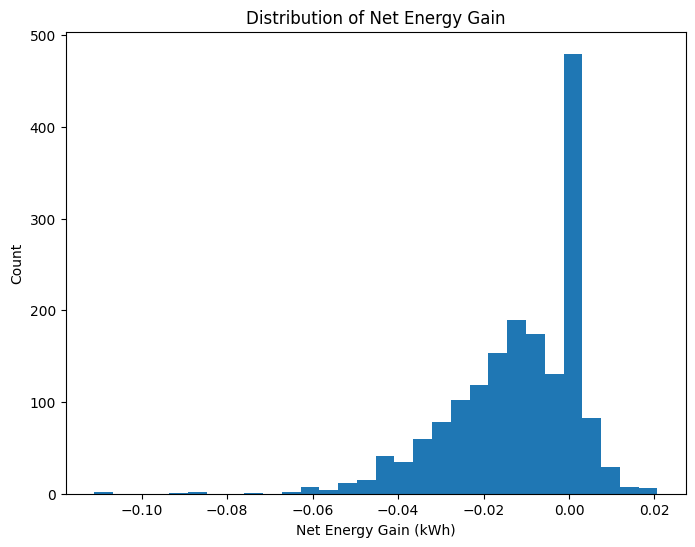

In [ ]:
#  For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip
bikes_data.loc[:, 'energy_gain'] = bikes_data['energy_collected'] - bikes_data['energy_used']

plt.figure(figsize=(8, 6))
bikes_data['energy_gain'].plot.hist(bins=30)
plt.title('Distribution of Net Energy Gain')
plt.xlabel('Net Energy Gain (kWh)')
plt.ylabel('Count')
plt.show()


There is a considerable number of trips with net energy gain value of 0, which indicates that in a substantional portion of trips, there is a relative balance between energy consumption and energy collected.

However there is a noticable difference between the number of energy loss and energy gain.

There are more trips that the energy was consumed than collected, which means the distribution of energy is not efficient enough.

More enegery-efficiency strageteries should be deveoped for specific bike trips as well as the potential areas for energy consumption and collection.


**Hypothesis Testing**

In [ ]:
# Hypothesis Testing
# Hypothesis 1:  Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type

single_ticket_duration = bikes_data[bikes_data['ticket'] == 'single']['duration']
season_ticket_duration = bikes_data[bikes_data['ticket'] == 'season']['duration']

pvalue_single_ticket_duration = shapiro(single_ticket_duration).pvalue
pvalue_season_ticket_durationn = shapiro(season_ticket_duration)

pvalue_hypothesis1 = 0

if pvalue_single_ticket_duration > 0.05 and pvalue_season_ticket_durationn > 0.05:
    t_test_pvalue = ttest_ind(single_ticket_duration, season_ticket_duration).pvalue
    pvalue_hypothesis1 = t_test_pvalue
    print("T-Test is selected for this statistical test")
    print(f"P-value: {t_test_pvalue}")
else:
    mannwhitneyu_pvalue = mannwhitneyu(single_ticket_duration, season_ticket_duration, alternative='two-sided').pvalue
    pvalue_hypothesis1 = mannwhitneyu_pvalue
    print("Mann-Whitney U is selected for this statistical test")
    print(f"P-value: {mannwhitneyu_pvalue}")

if pvalue_hypothesis1 < 0.05:
    print("There is a significant difference in travel times between single and season ticket types")
else:
    print("There is no significant difference in travel times between single and season ticket types")

print()

Mann-Whitney U is selected for this statistical test
P-value: 0.23770357868194747
There is no significant difference in travel times between single and season ticket types




**Hypothesis 1: Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type**

The data does not provide statistical evidence to claim that travel times tend to be shorter or longer for customers with single tickets compared to customers with season tickets. Both groups of customers appear to have similar travel times on average and similar preference regarding their trips. This may indicate that the type of ticket purchased does not strongly influence the duration of travel. Other factors like distance and cost should be taken into consideration for this analysis.


In [ ]:

# Hypothesis 2:  Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip
distance_pvalue = shapiro(bikes_data['distance']).pvalue
print(f"Distance p-value: {distance_pvalue}")
energy_used_pvalue = shapiro(bikes_data['energy_used']).pvalue
print(f"Energy Consumption Rate p-value: {energy_used_pvalue}")

pvalue_hypothesis2 = 0

if distance_pvalue > 0.05 and energy_used_pvalue > 0.05:
    pearsonr_pvalue = pearsonr(bikes_data['distance'], bikes_data['energy_used']).pvalue
    pvalue_hypothesis2 = pearsonr_pvalue
else:
    spearmanr_pvalue = spearmanr(bikes_data['distance'], bikes_data['energy_used']).pvalue
    pvalue_hypothesis2 = spearmanr_pvalue

if pvalue_hypothesis2 < 0.05:
    print("There is statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.")
else:
    print("There is no statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.")

print()

Distance p-value: 1.0127596274894045e-35
Energy Consumption Rate p-value: 8.957500129330294e-36
There is statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.



**Hypothesis 2:  Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip**

The positive correlation between travel distance and electricity consumption rate indicates that as the distance of travel increases, a corresponding increase in the average rate of electricity consumption during the trip. The longer of the bike rides, the more electricty is consumed. There are many factors that could contributes to this such as more challenging terrains or routes that require higher energy consumption.


In [ ]:

# Hypothesis 3: Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used
savonia_data = bikes_data[bikes_data['ticket'] == 'savonia']
single_data = bikes_data[bikes_data['ticket'] == 'single']
season_data = bikes_data[bikes_data['ticket'] == 'season']

savonia_assistance_counts = [len(savonia_data[savonia_data['assistance'] == 0]), len(savonia_data[savonia_data['assistance'] == 1])]
single_assistance_counts = [len(single_data[single_data['assistance'] == 0]), len(single_data[single_data['assistance'] == 1])]
season_assistance_counts = [len(season_data[season_data['assistance'] == 0]), len(season_data[season_data['assistance'] == 1])]

contingency_table = [savonia_assistance_counts, single_assistance_counts, season_assistance_counts]
print(contingency_table)

chi2_pvalue = chi2_contingency(contingency_table)[1]

# Print the results
print("Chi-Squared p-value")
print(f"P-value: {chi2_pvalue}")

if chi2_pvalue < 0.05:
    print("Savonia ticket type differs from others in electric assistance usage")
else:
    print("Savonia ticket type does not differ from others in electric assistance usage")



[[37, 212], [82, 863], [29, 512]]
Chi-Squared p-value
P-value: 5.0768273517787574e-05
Savonia ticket type differs from others in electric assistance usage


 **Hypothesis 3: Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used**

The chi-squared test results indicate that there is a significant difference in electric assistance usage among the three ticket types: Savonia, Single, and Season. Savonia ticket type is significantly different from the others in terms of electric assistance usage. This implies that there is a specific group of customers who have different preferences or requirements when it comes to electric assistance as well as the usage of Savonia ticket. While Single and Season ticket holders don't show a significant difference in terms of electric assistance. A different customer segments is considerable for Savonia ticket type.

**Future directions**

(B) Point out one or more problems in the questions asked or the approaches used above. Propose changes to address the problem(s). Explain how the changes would improve the statistical analysis.

While the analysis conducted so far provides valuable insights into the rental electric bike operations, there are several factors that can be used to enhance a more comprehensive understanding.

Missing data: By replacing invalid data with NaN can cause issue of data loss.

Consideration of other factors: The current analysis primarily focuses on distance, duration, energy consumption, and ticket types. While there could be a relation between the cost and the choice of ticket types as well as distance and duration. Other factors like user demographics could provide a deeper understanding of user behavior and preferences in choosing their ticket types.
